Number of stocks to analyze: 4
Enter the ticker of stock number 1: UBSG.SW
Enter the ticker of stock number 2: NESN.SW
Enter the ticker of stock number 3: SREN.SW
Enter the ticker of stock number 4: LONN.SW
Enter the start date of the analysis period in the format YYYY-MM-DD: 2014-1-1
Enter the end date of the analysis period in the format YYYY-MM-DD: 2018-12-31


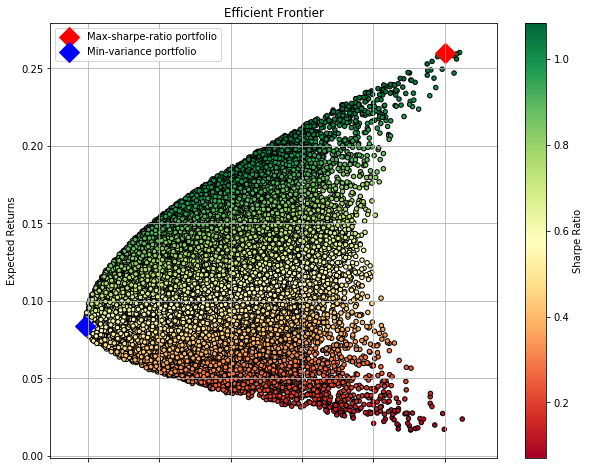


The portoflio with the maximum sharpe ratio is:                    13013
Returns         0.260178
Volatility      0.240073
Sharpe Ratio    1.083746
LONN.SW Weight  0.893922
NESN.SW Weight  0.102851
SREN.SW Weight  0.002675
UBSG.SW Weight  0.000551

The portfolio with the minimum variance is:                    34479
Returns         0.083489
Volatility      0.139142
Sharpe Ratio    0.600022
LONN.SW Weight  0.011933
NESN.SW Weight  0.615573
SREN.SW Weight  0.358965
UBSG.SW Weight  0.013529


In [4]:
# import needed modules
import numpy as np
import pandas as pd
import pandas_datareader.data as web
%matplotlib inline
import matplotlib.pyplot as plt

# get user's desired stocks
n = int(input("Number of stocks to analyze: "))
stocks = [] 
for i in range(n):
    stocks.append(input('Enter the ticker of stock number %i: ' %(i+1)))

# sort stock in alphabetical order for calculation purposes
stocks.sort()

# get user's desired period of analysis
start_date = input(
    "Enter the start date of the analysis period in the format YYYY-MM-DD: ")
end_date = input(
    "Enter the end date of the analysis period in the format YYYY-MM-DD: ")

# download adjusted closing price for each stock from Yahoo Finance
data = web.DataReader(stocks, data_source='yahoo',
                      start=start_date, end=end_date)['Adj Close']
data.sort_index(inplace=True)

# calculate daily and annual returns of the stocks
returns_daily = data.pct_change()
returns_annual = returns_daily.mean() * 250

# calculate daily and annual covariance of returns of the stocks
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# MONTE CARLO SIMULATION:
# create empty lists to store returns, volatility, sharpe ratio and weights of the
# randomly generated portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for the randomly generated portfolios
num_assets = len(stocks)
num_portfolios = 50000

# set random seed for reproduction's sake
np.random.seed(101)

# calculate for each randomly generated portfolio return, risk(volatility), sharpe
# ratio and weights; and store the results in the corresponding list 
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# PLOT THE RESULTS:
# set a dictionary for returns, risk(volatility) and sharpe ratio of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend the dictionary to accomodate each ticker and weight of the stocks 
# in the portfolio
for counter,symbol in enumerate(stocks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for the desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + \
    [stock+' Weight' for stock in stocks]

# find the min-volatility & max-sharpe ratio values in the dataframe
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min-volatility & max-sharpe ratio values to locate and create the two 
# portfolios of interest
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot the efficient frontier with a scatter plot coloured by the sharpe Ratio
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
# plot a red mark to highlight position of portfolio with the highest Sharpe ratio
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], 
            c='red', marker='D', s=200, label = 'Max-sharpe-ratio portfolio')
# plot a green mark to highlight position of portfolio with the lowest variance
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], 
            c='blue', marker='D', s=200, label = 'Min-variance portfolio')
plt.legend()
plt.show()

# print the details of the two desired portfolios
print("\nThe portoflio with the maximum sharpe ratio is:", sharpe_portfolio.T)
print("\nThe portfolio with the minimum variance is:", min_variance_port.T)